### Dianna Sinicrope
### DSC550 Week 8 Exercise
### 10/20/19

8.3 Exercise Original Case Study Part 3

Case Study: Predicting wine features  
Datasource: Wine Reviews: 130k wine reviews with variety, location, winery, price, and description  
Data link: https://www.kaggle.com/zynicide/wine-reviews/download#winemag-data-130k-v2.csv




### Part 1: Graph Analysis

#### Import libraries and load in the data

In [2]:
# import libraries
# data is from: 
# https://www.kaggle.com/zynicide/wine-reviews/download#winemag-data-130k-v2.csv

import pandas as pd
import yellowbrick
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Load data into a dataframe

addr1 = "/Users/dsinicro/Desktop/wine-reviews/winemag-data-130k-v2.csv"
data = pd.read_csv(addr1)


#### Display the dimensions of the file

In [5]:
# Step 2:  check the dimension of the table
# use shape()
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (129971, 14)


#### Display the first 10 rows of data so you can see the column headings and the type of data for each column.

In [6]:
data.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


#### Print summary statistics

In [7]:
# print summary statistics

print("Describe Data")
print(data.describe())
print("Summarized Data")
print(data.describe(include=['O']))

Describe Data
          Unnamed: 0         points          price
count  129971.000000  129971.000000  120975.000000
mean    64985.000000      88.447138      35.363389
std     37519.540256       3.039730      41.022218
min         0.000000      80.000000       4.000000
25%     32492.500000      86.000000      17.000000
50%     64985.000000      88.000000      25.000000
75%     97477.500000      91.000000      42.000000
max    129970.000000     100.000000    3300.000000
Summarized Data
       country                                        description designation  \
count   129908                                             129971       92506   
unique      43                                             119955       37979   
top         US  Ripe plum, game, truffle, leather and menthol ...     Reserve   
freq     54504                                                  3        2009   

          province     region_1       region_2 taster_name  \
count       129908       108724          50

#### Visualize data in histograms

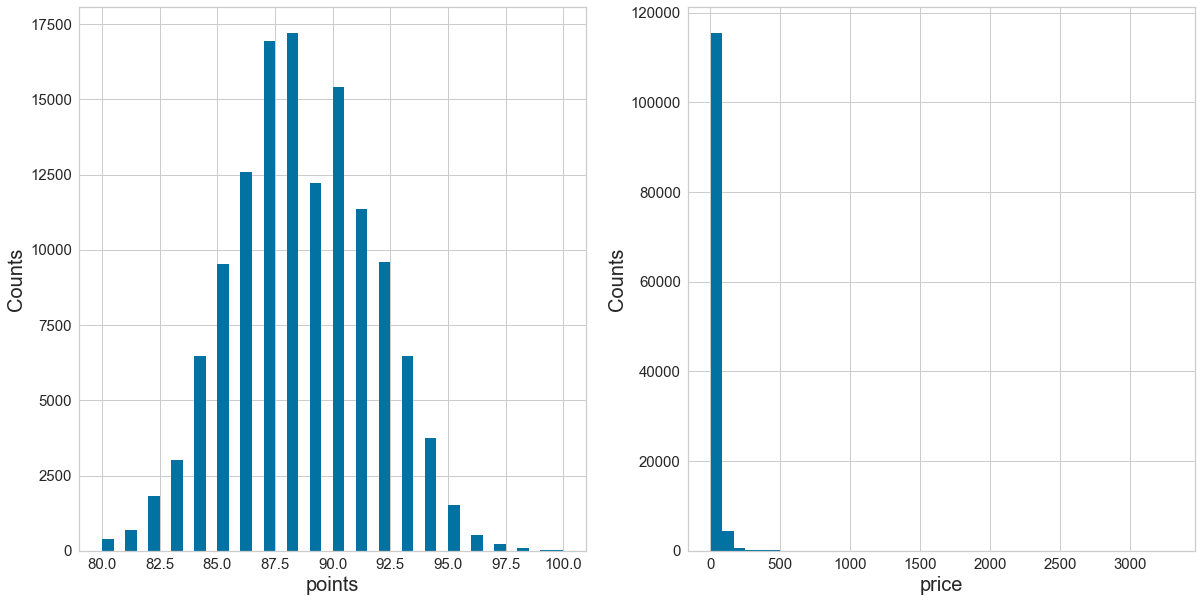

In [17]:
# Import visualization packages
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 2)

# Specify the features of interest. Using points and price.
num_features = ['points', 'price']
xaxes = num_features
yaxes = ['Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(data[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()


In [23]:
data['price'].max()

3300.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c240286d0>]],
      dtype=object)

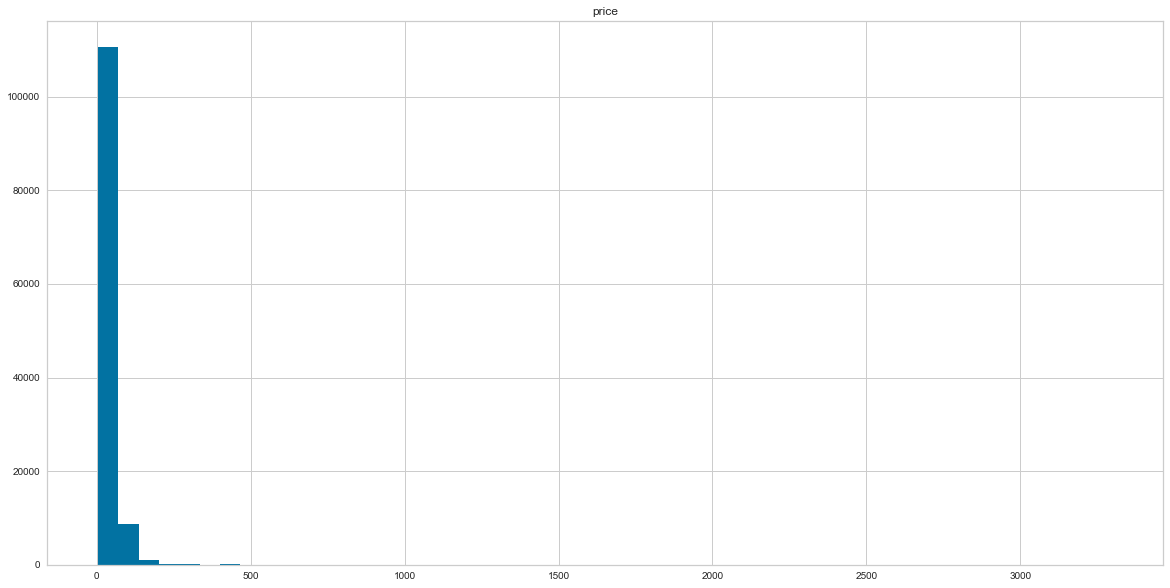

In [21]:
# trying to take a closer look at price, but max is $3,300 so the chart is correct

data.hist(column='price',bins = 50)

#### Visualize data in bar charts

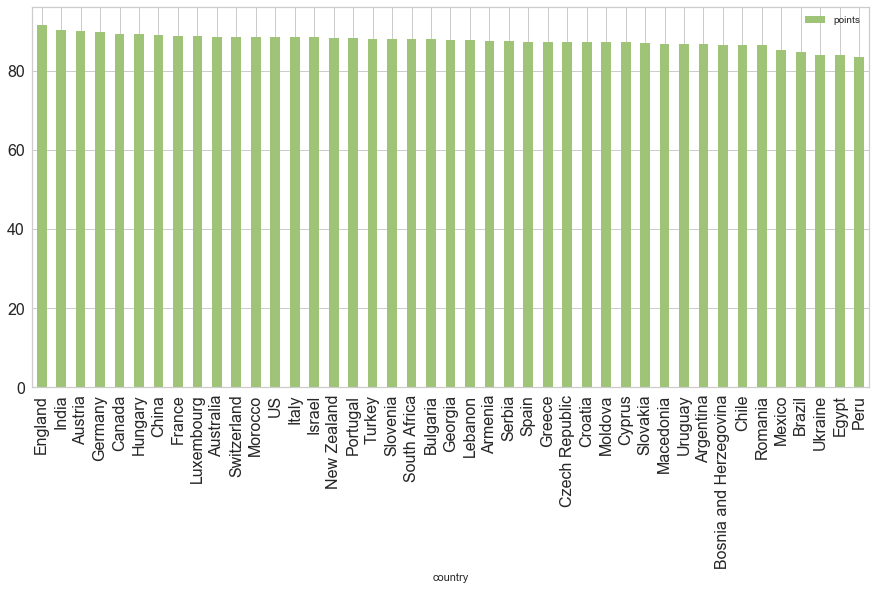

In [75]:
# plot average points by country
# not a ton of variance here

country_points= data.groupby('country', as_index=False)['points'].mean()

country_points.sort_values('country',inplace=True)


# saving this for later, how to plot without sorting
# country_points.plot.bar(y='points', x='country',color='g', fontsize=16)

# plot sorted by median points, descending
country_points.sort_values('points', ascending=False).plot.bar(y='points', x='country',color='g', fontsize=16)


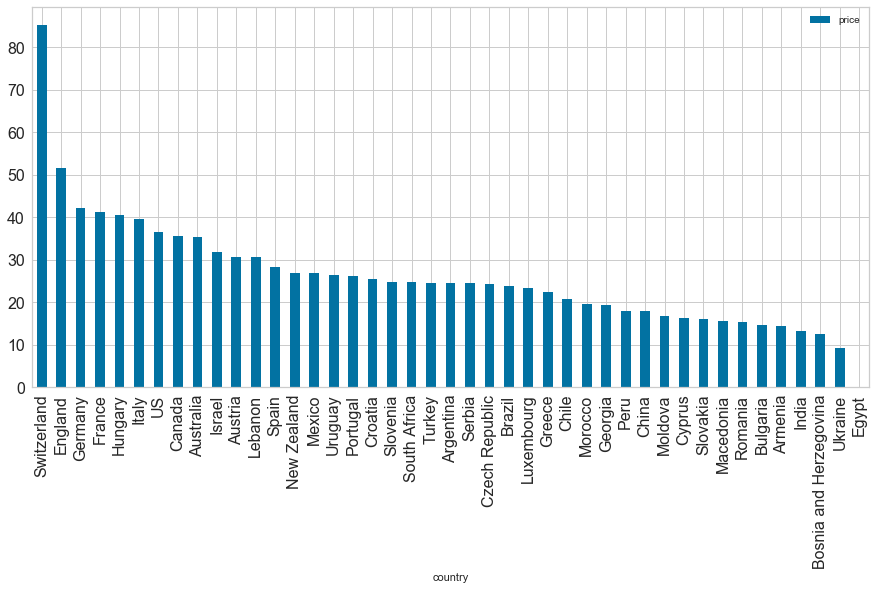

In [13]:
# plot average price by country
# more variance here. Would probably be good to create a new column of price: points ratio

country_price= data.groupby('country', as_index=False)['price'].mean()

country_price.sort_values('country',inplace=True)

# plot sorted by median price, descending
country_price.sort_values('price', ascending=False).plot.bar(y='price', x='country',color='b', fontsize=16)

#### Pearson correlation chart

array([[87., nan],
       [87., 15.],
       [87., 14.],
       ...,
       [90., 30.],
       [90., 32.],
       [90., 21.]])

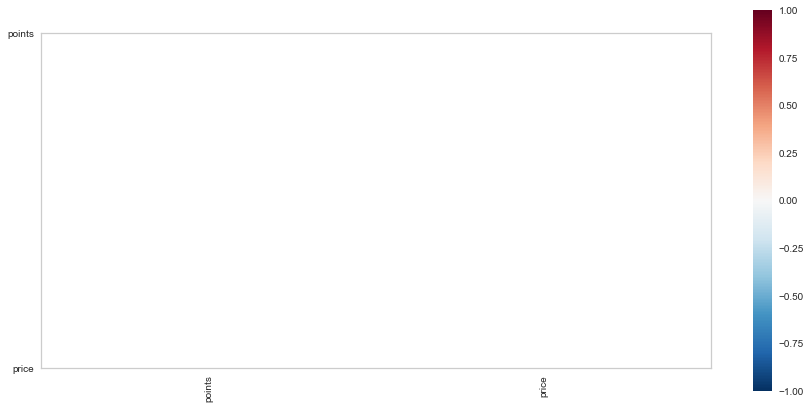

In [72]:
# create a pearson correlation chart

# check for correlations. Make sure that we don't have 
#Step 8: Pearson Ranking
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visualization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = data[num_features].values # had to change this line to .values to get it to work

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
# visualizer.poof(outpath="/Users/dsinicro/Desktop/pcoords1.png") # Draw/show/poof the data
#plt.show()


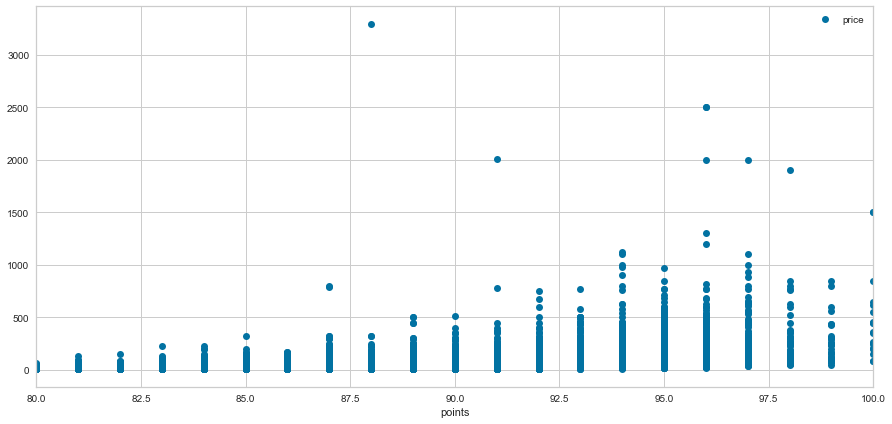

In [29]:
# create scatterplot
data.plot(x='points', y='price', style='o')

array([[87., 65.],
       [87., 19.],
       [87., 22.],
       ...,
       [90., 20.],
       [90., 35.],
       [90., 35.]])

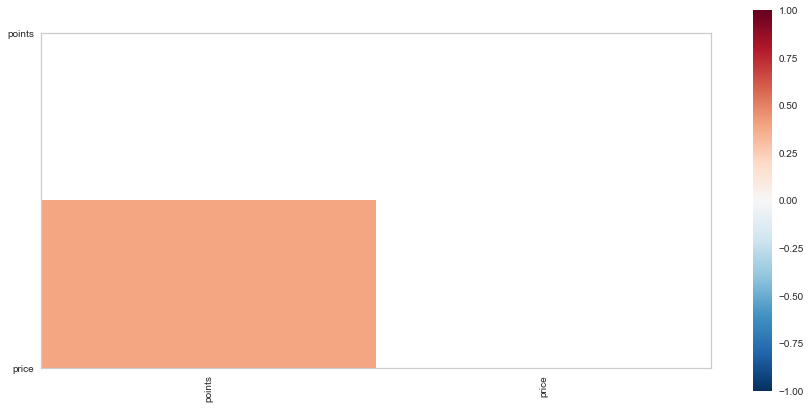

In [30]:
# create a pearson correlation chart
# shows a slight correlation between price and points

# drop NaN first 
dropped_na= data.dropna()

#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = dropped_na[num_features].values # had to change this line to .values to get it to work

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
# visualizer.poof(outpath="/Users/dsinicro/Desktop/pcoords1.png") # Draw/show/poof the data
#plt.show()


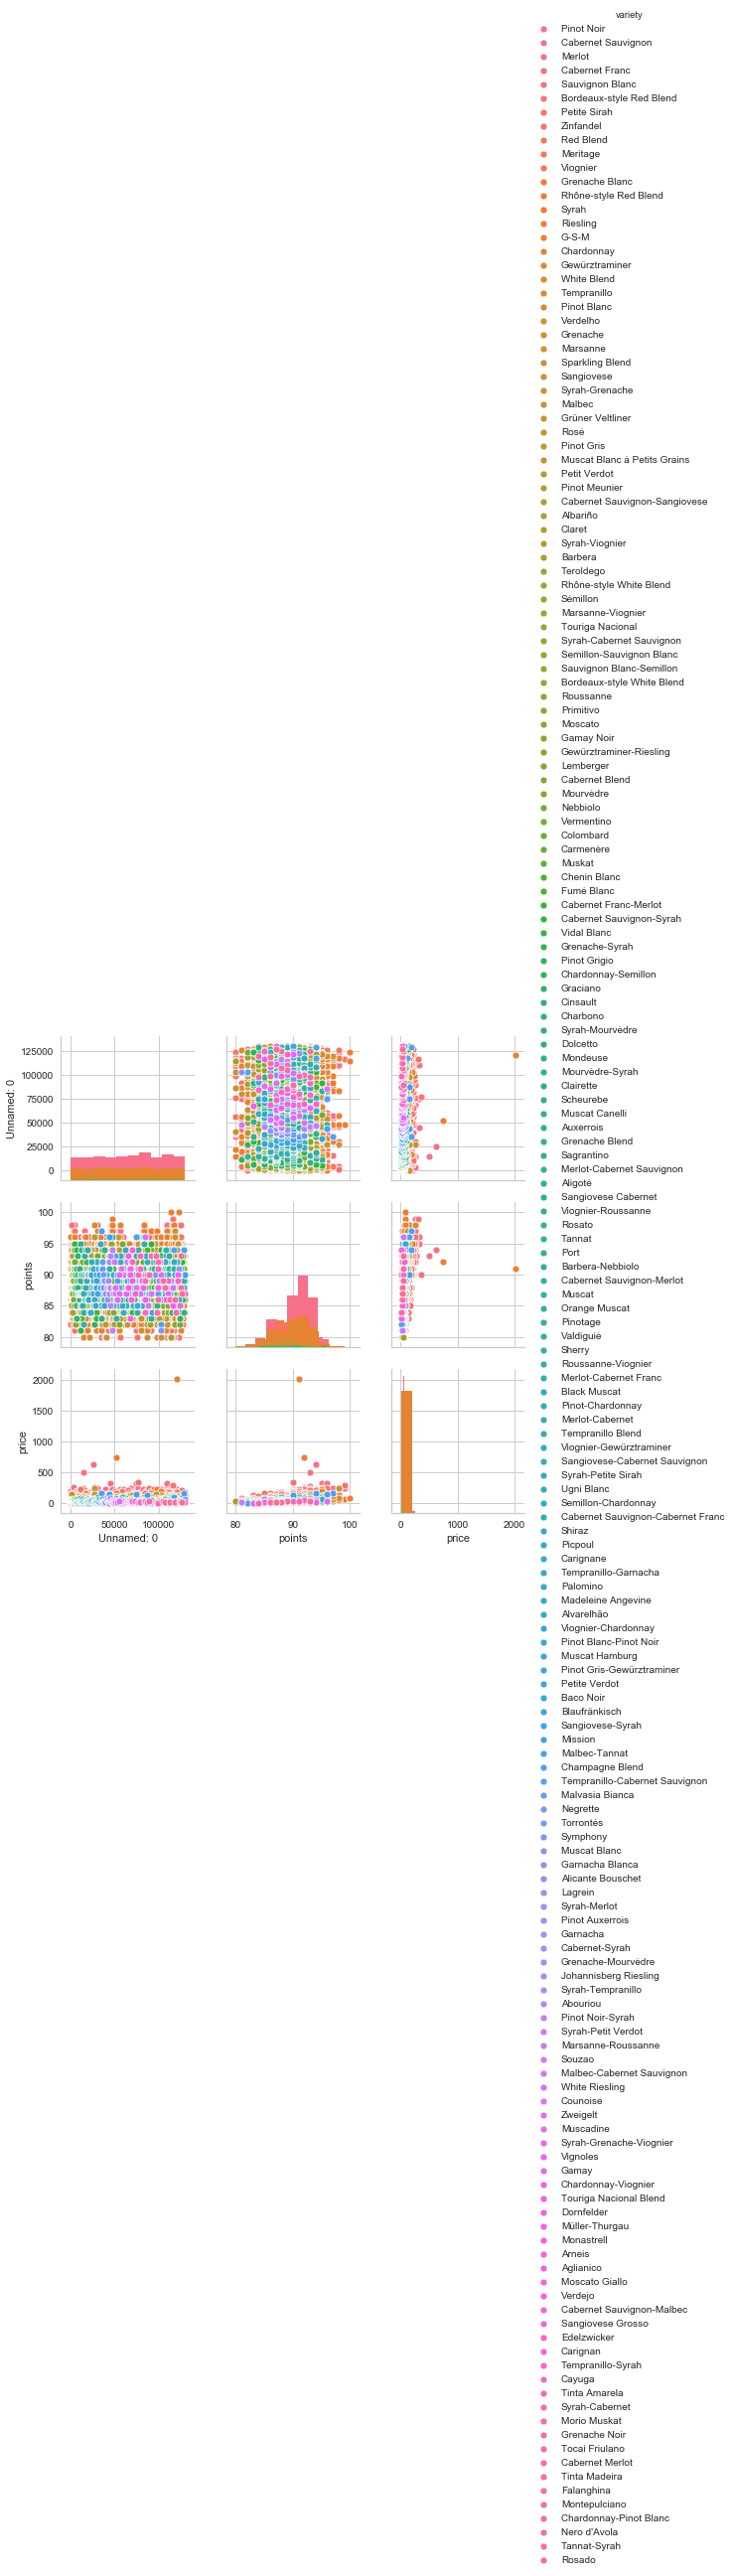

In [39]:
# the sheer number of varieties here muddies any insights that I was hoping to see. Will adjust this in Part 2 Dimensionality & Feature Reduction

import seaborn as sns
sns.pairplot(dropped_na, hue='variety', diag_kind='hist')

# too much going on here.

In [41]:
variety_count= dropped_na.groupby('variety', as_index=False)['price'].count()
variety_count

,variety,price
0,Abouriou,1
1,Aglianico,3
2,Albariño,45
3,Alicante Bouschet,4
4,Aligoté,2
...,...,...
178,Viognier-Roussanne,4
179,White Blend,334
180,White Riesling,2
181,Zinfandel,1114


In [ ]:
# Are better-rated wines reviewed more often?


variety_priceavg= dropped_na.groupby('variety', as_index=False)['price'].mean()
variety_count= dropped_na.groupby('variety', as_index=False)['price'].count()

country_price.sort_values('country',inplace=True)

# plot sorted by median price, descending
country_price.sort_values('price', ascending=False).plot.bar(y='price', x='country',color='b', fontsize=16)

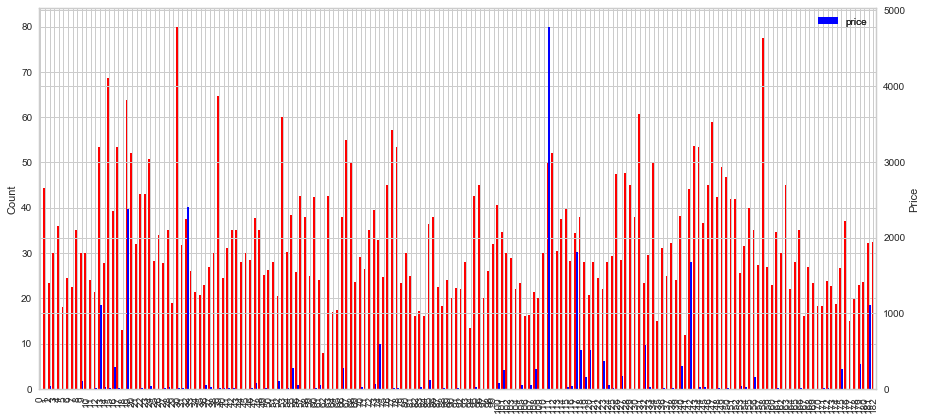

In [44]:
# this doesn't look like how I want it and my idea is to simplify the data by adding in whether each variety is a red or white wine. I'll address this in Part 2 Dimensionality & Feature Reduction.

fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

dropped_na.groupby('variety', as_index=False)['price'].mean().plot(kind='bar', color='red', ax=ax, width=width, position=1)
dropped_na.groupby('variety', as_index=False)['price'].count().plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Count')
ax2.set_ylabel('Price')

plt.show()

In [ ]:
# perform topic modeling on reviews

In [45]:
from __future__ import print_function

In [59]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [60]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [63]:
# convert the description column to a list
docs_raw = data["description"].tolist()
type(docs_raw)


list

In [64]:
len(docs_raw)

129971

In [65]:
# convert to document term matrix
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(docs_raw)
print(dtm_tf.shape)

(129971, 8415)


In [66]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw)
print(dtm_tfidf.shape)

/Users/dsinicro/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


(129971, 8415)


In [69]:
# Fit Latent Dirichlet Allocation models
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=20, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [70]:
# Visualizing the models with pyLDAvis
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/Users/dsinicro/anaconda3/envs/py37/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
16    -0.044252 -0.183383       1        1  7.377094
12     0.121861 -0.037704       2        1  6.745791
6     -0.017034 -0.286748       3        1  6.640892
18    -0.060966  0.168410       4        1  6.435751
0      0.173076  0.064431       5        1  6.351977
5     -0.130246  0.041420       6        1  6.323726
8      0.015587  0.175493       7        1  5.558603
7      0.064917 -0.069716       8        1  5.494746
17     0.274261 -0.026018       9        1  5.482479
11     0.082938  0.130296      10        1  5.179443
4      0.036192  0.101138      11        1  4.779304
3      0.148264  0.012513      12        1  4.391525
1      0.016802 -0.095232      13        1  4.326932
19    -0.211890 -0.136066      14        1  4.164451
15    -0.114493  0.011141      15        1  3.905807
2     -0.174691 -0.108722      16        1  3.778497
9      0.183155 -0.074423      17        1  3.695830
10    -0.212991  0.138002      18        1  3.453754
13     0.047989  0.087444      19        1  3.089934
14    -0.198477  0.087724      20        1  2.823467, topic_info=     Category          Freq      Term         Total  loglift  logprob
8279  Default  79931.000000      wine  79931.000000  30.0000  30.0000
997   Default  10743.000000  cabernet  10743.000000  29.0000  29.0000
5147  Default  38209.000000    palate  38209.000000  28.0000  28.0000
648   Default  28887.000000     black  28887.000000  27.0000  27.0000
7417  Default  30651.000000   tannins  30651.000000  26.0000  26.0000
...       ...           ...       ...           ...      ...      ...
3190  Topic20    478.963135      good   9472.537421   0.5827  -5.1888
461   Topic20    465.318937  balanced   8476.401160   0.6649  -5.2177
3237  Topic20    387.645317    grapes   3083.764495   1.4934  -5.4003
3460  Topic20    410.384890    herbal   6251.677316   0.8437  -5.3433
1336  Topic20    392.066381    citrus  11669.007464   0.1739  -5.3890

[1698 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
10        2  0.941514   abrasive
10        9  0.052960   abrasive
13       13  0.963565    abruzzo
23        3  0.961293     acacia
23       13  0.037946     acacia
...     ...       ...        ...
8404     10  0.056382  zinfandel
8404     11  0.672106  zinfandel
8404     12  0.071596  zinfandel
8404     20  0.010739  zinfandel
8408     11  0.971794      zinny

[6416 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 13, 7, 19, 1, 6, 9, 8, 18, 12, 5, 4, 2, 20, 16, 3, 10, 11, 14, 15])

In [77]:
# Save LDAvis to html
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

p = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)
pyLDAvis.save_html(p, 'wine_lda.html')


KeyboardInterrupt: 

#### Part 2: Dimensionality & Feature Reduction


In [83]:
# reduce dimensionality by assigning either red or white to each grape variety
# save list of varieties to excel so I can input whether it's red or white

varieties= data.groupby('variety', as_index=False)['points'].count()
varieties

,variety,points
0,Abouriou,3
1,Agiorgitiko,63
2,Aglianico,359
3,Aidani,1
4,Airen,3
...,...,...
702,Zinfandel,2714
703,Zlahtina,2
704,Zweigelt,209
705,Çalkarası,2


In [96]:
# there are 707 different varieties in this dataset. I'll see if any of them line up with my list of red vs. white wine grape varieties that I pulled from :
# Reds: https://en.wikipedia.org/w/index.php?title=Category:Red_wine_grape_varieties&pagefrom=Merille#mw-pages
# Whites: https://en.wikipedia.org/wiki/Category:Wine_grape_varieties

# read in csv with red vs. white wine grape varieties

addr_varieties = "/Users/dsinicro/PycharmProjects/DSC550Sinicrope/wine_types_wiki.csv"
wine_type_wiki = pd.read_csv(addr_varieties)
wine_type_wiki.head(15)

,variety,color
0,Rèze,white
1,Zéta,white
2,Airén,white
3,Hebén,white
4,Montù,white
5,Po_ip,white
6,Aidini,white
7,Amigne,white
8,Arbane,white
9,Arilla,white


In [142]:
# make all lowercase first in both dataframes
data['variety_lower'] = data['variety'].str.lower()
wine_type_wiki['variety_lower'] = wine_type_wiki['variety'].str.lower()

# See if there are any matches
df_merged = data.merge(wine_type_wiki, on='variety_lower', how='left')
df_merged.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety_x,winery,variety_lower,variety_y,color
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,white blend,NaN,NaN
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,portuguese red,NaN,NaN
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,pinot gris,Pinot gris,white
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,riesling,Riesling,white
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,pinot noir,Pinot noir,red


In [107]:
# take a look to see what didn't get labeled as red or white

df_merged_filled =df_merged.fillna("placeholder_Nan")


red_white= df_merged_filled.groupby(['color','variety_lower']).count() # Use a placeholder to fill in NaN's that way they come up in the report

# red_white= df_merged.fillna("placeholder_Nan").groupby(['color','variety_lower']).count() # Use a placeholder to fill in NaN's that way they come up in the report

red_white



Unnamed: 0  country  description  designation  \
color           variety_lower                                                   
placeholder_Nan aidani                   1        1            1            1   
                airen                    3        3            3            3   
                albana                  23       23           23           23   
                albanello                1        1            1            1   
                alfrocheiro             16       16           16           16   
...                                    ...      ...          ...          ...   
white           viosinho                 5        5            5            5   
                vitovska                 3        3            3            3   
                welschriesling          25       25           25           25   
                xynisteri                2        2            2            2   
                zierfandler             16       16           16           16   

                                points  price  province  region_1  region_2  \
color           variety_lower                                                 
placeholder_Nan aidani               1      1         1         1         1   
                airen                3      3         3         3         3   
                albana              23     23        23        23        23   
                albanello            1      1         1         1         1   
                alfrocheiro         16     16        16        16        16   
...                                ...    ...       ...       ...       ...   
white           viosinho             5      5         5         5         5   
                vitovska             3      3         3         3         3   
                welschriesling      25     25        25        25        25   
                xynisteri            2      2         2         2         2   
                zierfandler         16     16        16        16        16   

                                taster_name  taster_twitter_handle  title  \
color           variety_lower                                               
placeholder_Nan aidani                    1                      1      1   
                airen                     3                      3      3   
                albana                   23                     23     23   
                albanello                 1                      1      1   
                alfrocheiro              16                     16     16   
...                                     ...                    ...    ...   
white           viosinho                  5                      5      5   
                vitovska                  3                      3      3   
                welschriesling           25                     25     25   
                xynisteri                 2                      2      2   
                zierfandler              16                     16     16   

                                variety_x  winery  variety_y  
color           variety_lower                                 
placeholder_Nan aidani                  1       1          1  
                airen                   3       3          3  
                albana                 23      23         23  
                albanello               1       1          1  
                alfrocheiro            16      16         16  
...                                   ...     ...        ...  
white           viosinho                5       5          5  
                vitovska                3       3          3  
                welschriesling         25      25         25  
                xynisteri               2       2          2  
                zierfandler            16      16         16  

[708 rows x 15 columns]

In [141]:
Nan_color = df_merged_filled[df_merged_filled['color'].str.match('placeholder_Nan')]
Nan_color.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety_x,winery,variety_lower,variety_y,color,color2
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,placeholder_Nan,Sicily & Sardinia,Etna,placeholder_Nan,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,white blend,placeholder_Nan,placeholder_Nan,placeholderNan
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,placeholder_Nan,placeholder_Nan,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,portuguese red,placeholder_Nan,placeholder_Nan,placeholderNan
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15,Northern Spain,Navarra,placeholder_Nan,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,tempranillo-merlot,placeholder_Nan,placeholder_Nan,placeholderNan
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,placeholder_Nan,Sicily & Sardinia,Etna,placeholder_Nan,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte,nerello mascalese,placeholder_Nan,placeholder_Nan,placeholderNan
18,18,Spain,"Desiccated blackberry, leather, charred wood a...",Vendimia Seleccionada Finca Valdelayegua Singl...,87,28,Northern Spain,Ribera del Duero,placeholder_Nan,Michael Schachner,@wineschach,Pradorey 2010 Vendimia Seleccionada Finca Vald...,Tempranillo Blend,Pradorey,tempranillo blend,placeholder_Nan,placeholder_Nan,placeholderNan


In [114]:
# I can see a lot of blends that either contain the string "red" or "white" in variety. I also see some roses, oops. Might need an "other" classification
# if color = placeholder_Nan and variety_lower contains red or white, then red or white. Else placeholder_Nan
 # can't quite figure out how to get three if statements together so doing in excel for now.
# df_merged_filled["color2"] = ["white" if ele  == "white" else "placeholderNan" for ele in df_merged_filled["variety_lower"]]
# df_merged_filled.head(50)

In [117]:
# save to file so I can manually make red vs. white wine classifications for the varieties that didn't match with my Wikipedia data.

data.to_csv(r'/Users/dsinicro/PycharmProjects/DSC550Sinicrope/wine_needscolor.csv')

In [120]:
# did some data wrangling in excel to get as many colors as I could for the wines. I still have about 47K still undefined. Not bad! Not plausible for me to label all of them with this exercise, especially since so much time to manually label them is required.
# read back in excel file

xls = pd.ExcelFile('/Users/dsinicro/PycharmProjects/DSC550Sinicrope/wine_needscolor.xlsx')
df1 = pd.read_excel(xls, 'wine_needscolor')
df1.head()

,Column1,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,...,taster_twitter_handle,title,variety,winery,variety_lower,contains_red_white,Column2,concat_color,color_2,color_3
0,0,0.0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulk√† Bianco,87.0,NaN,Sicily & Sardinia,Etna,NaN,...,@kerinokeefe,Nicosia 2013 Vulk√† Bianco (Etna),White Blend,Nicosia,white blend,white,NaN,white,NaN,white
1,1,1.0,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,NaN,NaN,...,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,portuguese red,red,NaN,red,NaN,red
2,2,2.0,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,...,@paulgwine¬†,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,pinot gris,NaN,white,white,NaN,white
3,3,3.0,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,NaN,...,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,riesling,NaN,white,white,NaN,white
4,4,4.0,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,...,@paulgwine¬†,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,pinot noir,NaN,red,red,NaN,red


In [124]:
# time to drop columns that I won't be using

#there are different ways to do this. I'll just select the ones I want
# Using DataFrame.drop
# df.drop(df.columns[[1, 2]], axis=1, inplace=True)

# drop by Name
# df1 = df1.drop(['B', 'C'], axis=1)

# Select the ones you want
# df1 = df[['a','d']]

df2 = df1[['country','description','points','price', 'variety_lower','color_3']]
df2.head()

# this is a much more usable dataset for my needs!

,country,description,points,price,variety_lower,color_3
0,Italy,"Aromas include tropical fruit, broom, brimston...",87.0,NaN,white blend,white
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87.0,15.0,portuguese red,red
2,US,"Tart and snappy, the flavors of lime flesh and...",87.0,14.0,pinot gris,white
3,US,"Pineapple rind, lemon pith and orange blossom ...",87.0,13.0,riesling,white
4,US,"Much like the regular bottling from 2012, this...",87.0,65.0,pinot noir,red


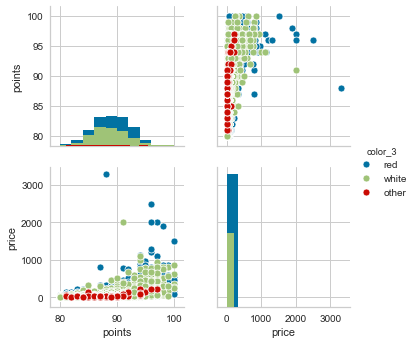

In [128]:
# going to run the seaborn charts again now that I've reduced dimensionality

# drop na's first
df3 = df2.dropna()


sns.pairplot(df3, hue='color_3', diag_kind='hist')

# looking at plot #1 and plot #3. Histogram distribution of points looks interesting. Going to create larger hist.

In [134]:
# red_wine =  df2['color_3']=="red"
 
red_wine= df3[df3['color_3'].str.contains("red")]

red_wine.head(10)

,country,description,points,price,variety_lower,color_3
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87.0,15.0,portuguese red,red
4,US,"Much like the regular bottling from 2012, this...",87.0,65.0,pinot noir,red
5,Spain,Blackberry and raspberry aromas show a typical...,87.0,15.0,tempranillo-merlot,red
6,Italy,"Here's a bright, informal red that opens with ...",87.0,16.0,frappato,red
10,US,"Soft, supple plum envelopes an oaky structure ...",87.0,19.0,cabernet sauvignon,red
12,US,"Slightly reduced, this wine offers a chalky, t...",87.0,34.0,cabernet sauvignon,red
16,Argentina,"Baked plum, molasses, balsamic vinegar and che...",87.0,30.0,malbec,red
17,Argentina,Raw black-cherry aromas are direct and simple ...,87.0,13.0,malbec,red
18,Spain,"Desiccated blackberry, leather, charred wood a...",87.0,28.0,tempranillo blend,red
19,US,"Red fruit aromas pervade on the nose, with cig...",87.0,32.0,meritage,red


In [135]:
white_wine= df3[df3['color_3'].str.contains("white")]

white_wine.head(10)

,country,description,points,price,variety_lower,color_3
2,US,"Tart and snappy, the flavors of lime flesh and...",87.0,14.0,pinot gris,white
3,US,"Pineapple rind, lemon pith and orange blossom ...",87.0,13.0,riesling,white
7,France,This dry and restrained wine offers spice in p...,87.0,24.0,gew√ºrztraminer,white
8,Germany,Savory dried thyme notes accent sunnier flavor...,87.0,12.0,gew√ºrztraminer,white
9,France,This has great depth of flavor with its fresh ...,87.0,27.0,pinot gris,white
11,France,"This is a dry wine, very spicy, with a tight, ...",87.0,30.0,gew√ºrztraminer,white
14,US,Building on 150 years and six generations of w...,87.0,12.0,chardonnay,white
15,Germany,Zesty orange peels and apple notes abound in t...,87.0,24.0,riesling,white
22,Italy,Delicate aromas recall white flower and citrus...,87.0,19.0,white blend,white
26,Italy,Pretty aromas of yellow flower and stone fruit...,87.0,13.0,white blend,white


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c66e89890>]],
      dtype=object)

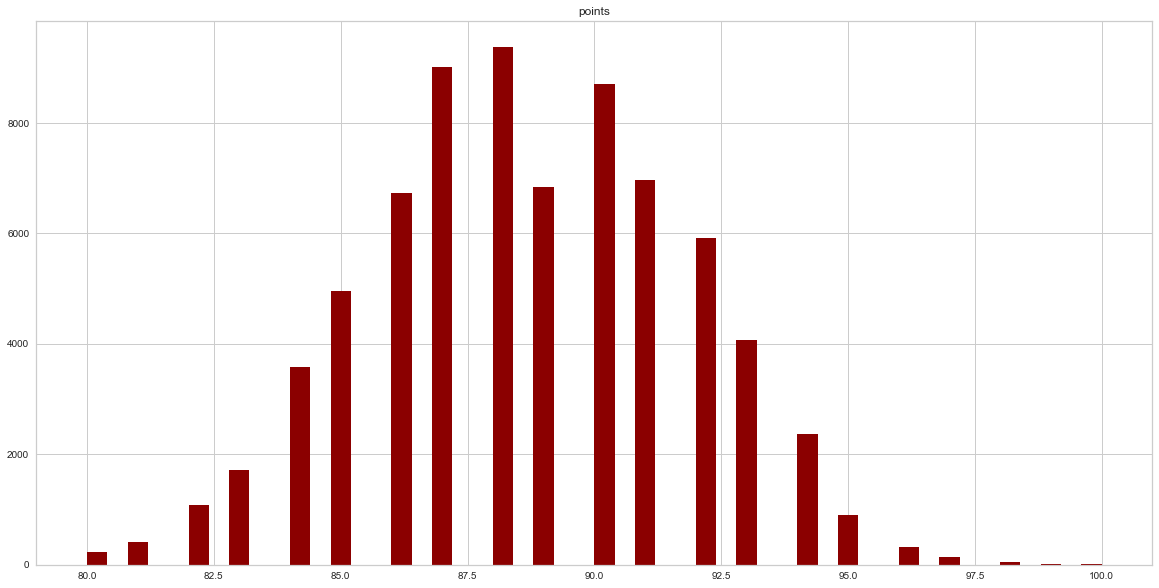

In [149]:
# look at histogram for red_wine points
red_wine.hist(column='points', color = 'darkred',bins = 50)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c61782890>]],
      dtype=object)

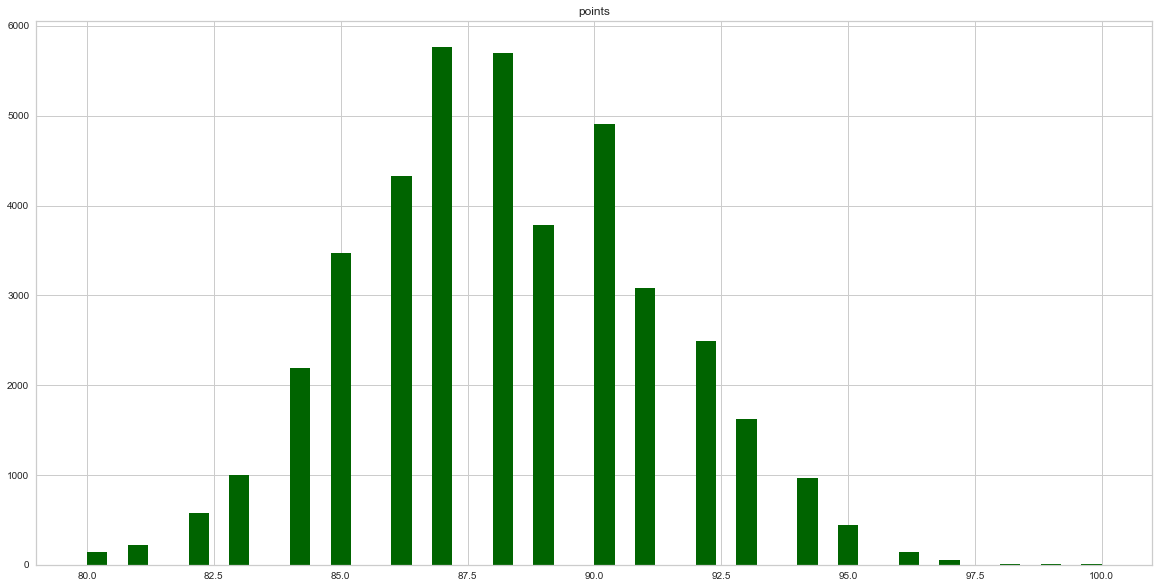

In [178]:
# look at histogram for white_wine points
white_wine.hist(column='points', color= 'darkgreen', bins = 50)

# I don't see a ton of differences in the distributions between points for red wine and points for white wines

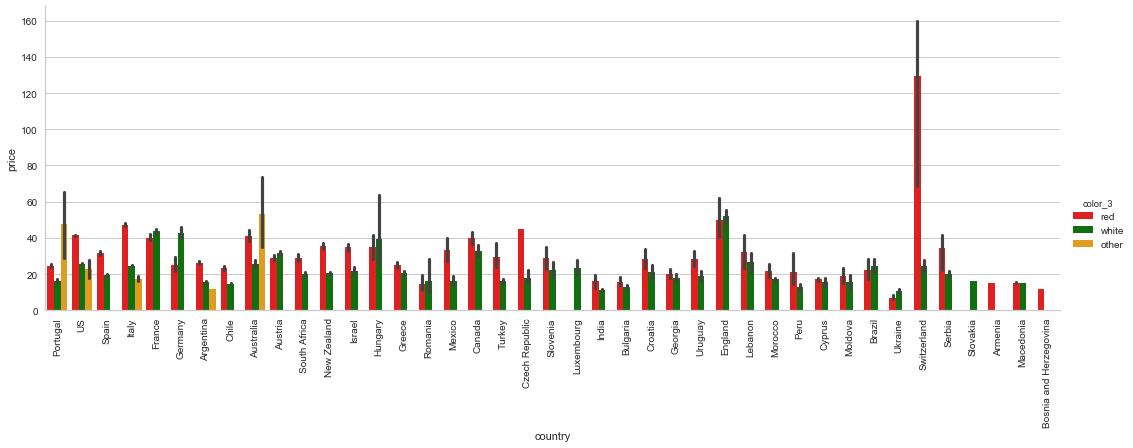

In [179]:
g= sns.factorplot(x='country', y='price', hue='color_3', kind='bar', aspect=3,palette=["red", "green", "orange"], data=df3) 
g.set_xticklabels(rotation=90)

# in general, most red wines have a higher price in each country compared to white wines.
# interesting and makes sense that Portugal, known for their ports, has a higher average price for "other" types of wines
# also interesting that France (thinking champagnge, which got categorized as white) has higher white prices than red
# similar with Germany. I think of them as producing more whites than reds. A subject matter expert could probably weigh in on this more though.

#### Part 3 Model Evaluation and Selection

In [168]:
# before splitting into test and training sets, need to convert categorical data of red vs white ie color_3 column to numerical
# numeric for categorical wil be ML readable.
#Step 13 - convert categorical data to numbers
#get the categorical data
cat_features = ['color_3']
data_cat = df3[cat_features]
data_cat = data_cat.replace({'color_3': {1: 'red', 2: 'white', 3: 'other'}})
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))


   color_3_other  color_3_red  color_3_white
1              0            1              0
2              0            0              1
3              0            0              1
4              0            1              0
5              0            1              0
6              0            1              0
7              0            0              1
8              0            0              1


In [194]:
# Later in, I'll learn how to evaluate my LDA model. But for right now, I'll look at price, points, and country to evaluate color

# keep this for later:
# https://towardsdatascience.com/unsupervised-nlp-topic-models-as-a-supervised-learning-input-cf8ee9e5cf28
# train_vecs = []
# for i in range(len(rev_train)):
#     top_topics = lda_train.get_document_topics(train_corpus[i], minimum_probability=0.0)
#     topic_vec = [top_topics[i][1] for i in range(20)]
#     topic_vec.extend([rev_train.iloc[i].real_counts]) # counts of reviews for restaurant
#     topic_vec.extend([len(rev_train.iloc[i].text)]) # length review
#     train_vecs.append(topic_vec)

#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together

features_model = ['price', 'points']
data_model_X = pd.concat([df3[features_model], data_cat_dummies], axis=1)




In [195]:
# create a whole target dataset that can be used for train and validation data splitting

data_model_y = df3.replace({'color_3': {1: 'red', 0: 'white'}})



In [196]:
# separate data into training and validation and check the details of the datasets
# import packages

from sklearn.model_selection import train_test_split

In [197]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.25, random_state=11)



In [198]:
# number of samples in each set
# also proof that the data was split

print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])


No. of samples in training set:  85854
No. of samples in validation set: 28618


In [211]:
# red vs. white
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())

#  This error is stoppping me from moving on to everything below. Unsure what the cause of the error is here since I seem to have a validation and training set. Will have to come back to this.



No. of survived and not-survived in the training set:


AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [200]:
# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC


In [201]:
# Instantiate the classification model 
model = LogisticRegression(solver='liblinear')


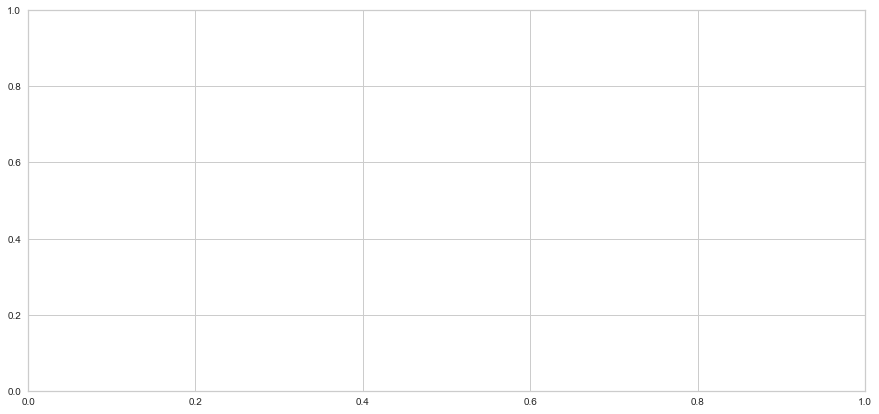

In [212]:
#The ConfusionMatrix visualizer taxes a model
classes = ['red','white']
cm = ConfusionMatrix(model, classes=classes, percent=False)


In [203]:
#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)


ValueError: bad input shape (85854, 6)

In [204]:
#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.

# score gives you an actual percentage score of how well the model did
cm.score(X_val, y_val)

NotFitted: could not determine required property classes_; the visualizer must either be fit or instantiated with a fitted classifier before calling score()

In [205]:
# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

In [207]:
#How did we do?
cm.show()


In [208]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20


ValueError: bad input shape (85854, 6)

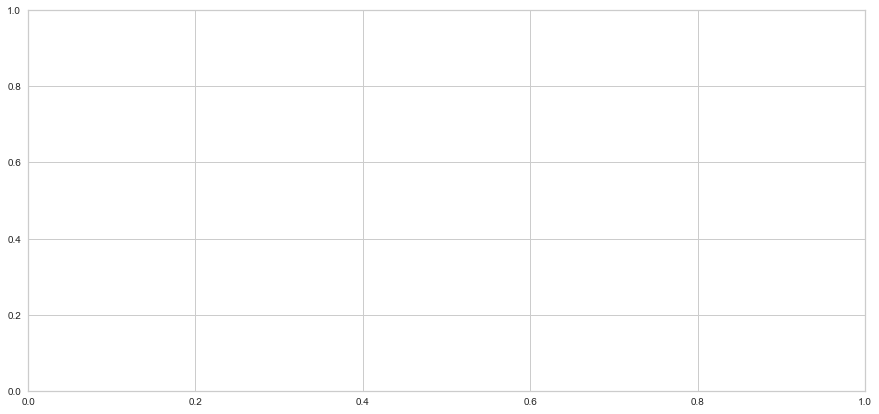

In [209]:
# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# confusion matrix looks good

ValueError: bad input shape (85854, 6)

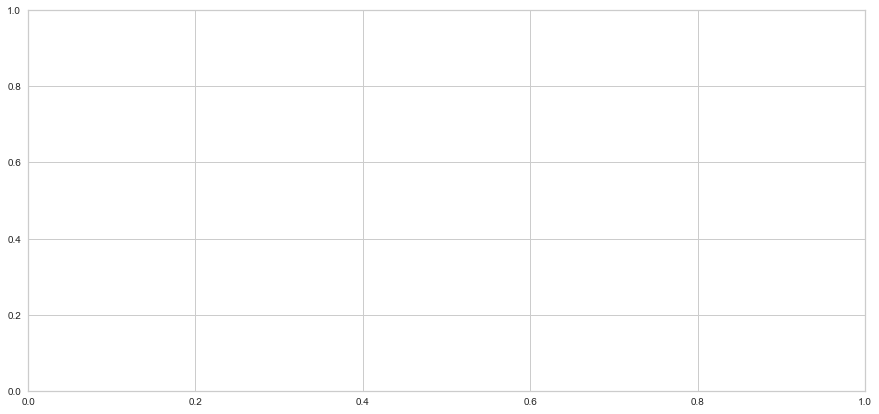

In [210]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

# dotted line is what it would have been as random guesses, so any curves above that have increased accuracy